In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

In [5]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [15]:
books['Publication_Date'] = pd.to_datetime(books['Year-Of-Publication'], format='%Y', errors='coerce')
books['Year-Of-Publication'] = books['Publication_Date'].dt.year

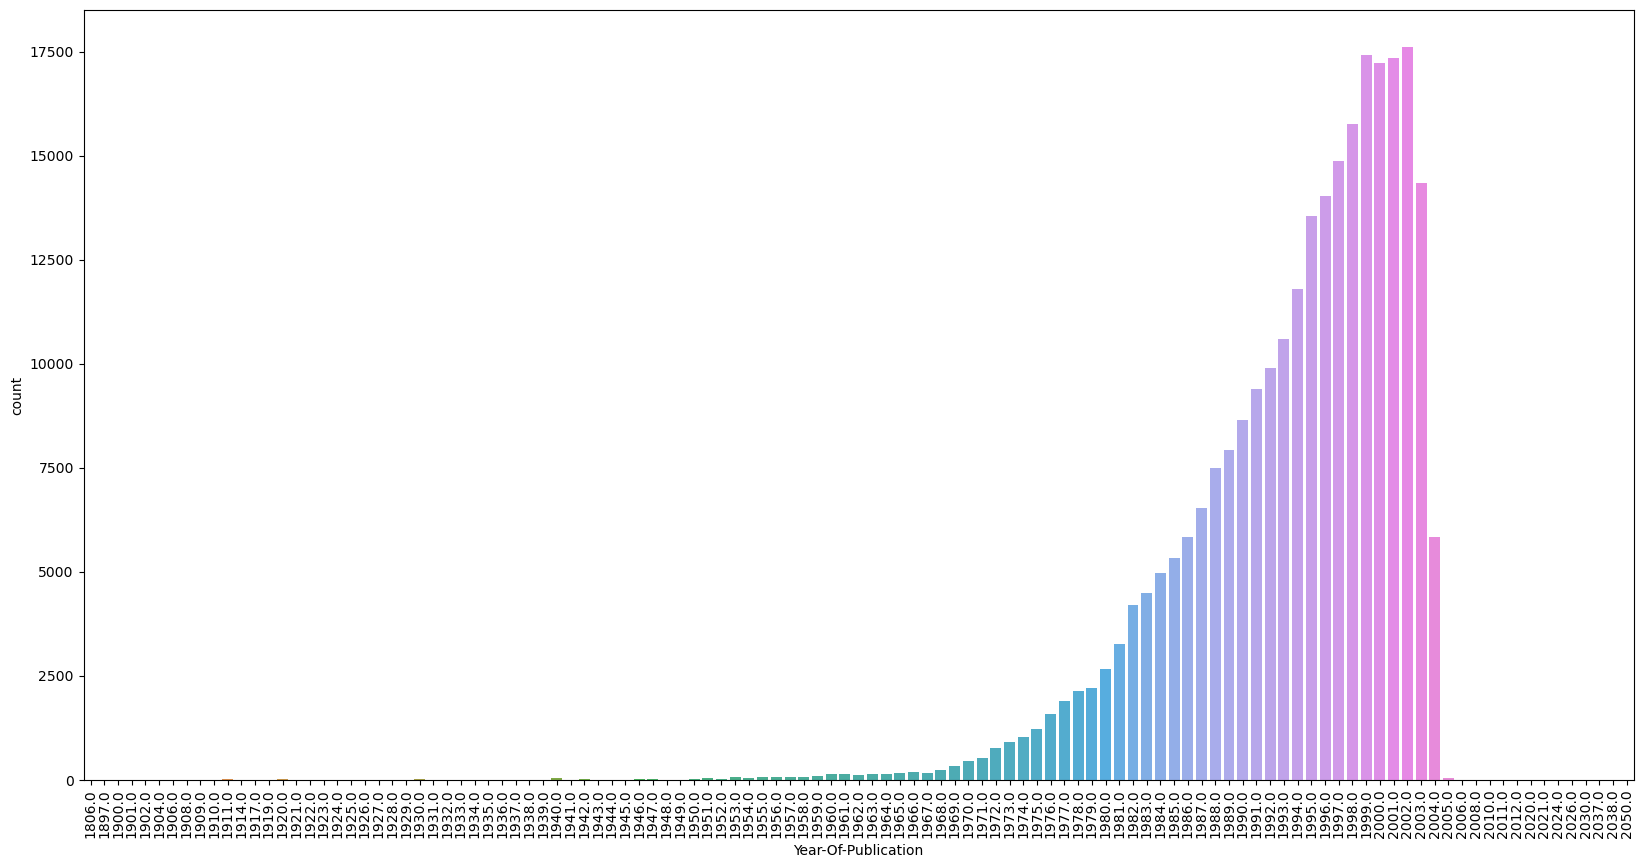

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x=books['Year-Of-Publication'])
plt.xticks(rotation=90)
plt.show()

In [19]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 9)
(1149780, 3)
(278858, 3)


In [22]:
books.duplicated().sum()

0

In [23]:
books['Book-Title'].duplicated().sum()

29225

In [24]:
books = books.drop_duplicates(subset='Book-Title')

In [26]:
books.drop(columns=['Image-URL-S', 'Image-URL-M','Image-URL-L'], inplace=True)

In [27]:
books_with_ratings = ratings.merge(books, on='ISBN')
books_with_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Publication_Date
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,2002-01-01
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,1999-01-01
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,2001-01-01
3,276746,0425115801,0,Lightning,Dean R. Koontz,1996.0,Berkley Publishing Group,1996-01-01
4,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002.0,Ballantine Books,2002-01-01
...,...,...,...,...,...,...,...,...
883074,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig,1998-01-01
883075,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press,2000-01-01
883076,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf,1997-01-01
883077,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books,1996-01-01


In [28]:
books_with_ratings_of_users = books_with_ratings.merge(users, on='User-ID')
books_with_ratings_of_users

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Publication_Date,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,2002-01-01,"tyler, texas, usa",NaN
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,1999-01-01,"rijeka, n/a, croatia",16.0
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,2001-01-01,"rijeka, n/a, croatia",16.0
3,276746,0425115801,0,Lightning,Dean R. Koontz,1996.0,Berkley Publishing Group,1996-01-01,"fort worth, ,",NaN
4,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002.0,Ballantine Books,2002-01-01,"fort worth, ,",NaN
...,...,...,...,...,...,...,...,...,...,...
883074,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig,1998-01-01,"cedar park, texas, usa",NaN
883075,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press,2000-01-01,"cedar park, texas, usa",NaN
883076,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf,1997-01-01,"quebec, quebec, canada",18.0
883077,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books,1996-01-01,"mannington, west virginia, usa",38.0


In [29]:
books_with_ratings_of_users.drop(columns=['ISBN', 'Publication_Date','Location','Age'], axis=1, inplace=True)
books_with_ratings_of_users

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276729,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
2,276729,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
3,276746,0,Lightning,Dean R. Koontz,1996.0,Berkley Publishing Group
4,276746,0,Manhattan Hunt Club,JOHN SAUL,2002.0,Ballantine Books
...,...,...,...,...,...,...
883074,276704,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig
883075,276704,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
883076,276706,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
883077,276709,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books


In [35]:
books_with_ratings_of_users.isna().sum()

User-ID                    0
Book-Rating                0
Book-Title                 0
Book-Author                2
Year-Of-Publication    11631
Publisher                  1
dtype: int64

In [36]:
books_with_ratings_of_users.dropna(inplace = True)
books_with_ratings_of_users.shape

(871445, 6)

In [39]:
x = books_with_ratings_of_users.groupby('User-ID').count()['Book-Rating'] > 100
knowledgeable_users = x[x].index
acknowledged_books = books_with_ratings_of_users[books_with_ratings_of_users['User-ID'].isin(knowledgeable_users)]
acknowledged_books

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
990,277427,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
991,277427,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995.0,John Wiley &amp; Sons
992,277427,8,Pioneers,James Fenimore Cooper,1974.0,Thomson Learning
993,277427,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982.0,Henry Holt &amp; Co
994,277427,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002.0,Avon Books
...,...,...,...,...,...,...
882965,276680,0,City of Masks : A Cree Black Novel,Daniel Hecht,2004.0,Bloomsbury USA
882966,276680,7,Fairy Tale (Common Reader Editions),Alice Thomas Ellis,2001.0,Akadine Press
882967,276680,8,Parnassus on Wheels (Common Reader Editions),Christopher Morley,2000.0,Joiner/Oriel Inc
882968,276680,0,Haunted Bookshop (Common Reader Editions),Christopher Morley,2000.0,Akadine Press


In [40]:
y = acknowledged_books.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index
final = acknowledged_books[acknowledged_books['Book-Title'].isin(famous_books)]
final

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
990,277427,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
1002,277427,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999.0,Perennial
1004,277427,0,Bel Canto: A Novel,Ann Patchett,2002.0,Perennial
1007,277427,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch
1015,277427,0,The Tao of Pooh,Benjamin Hoff,1983.0,Penguin Books
...,...,...,...,...,...,...
882888,276680,8,The Da Vinci Code,Dan Brown,2003.0,Doubleday
882893,276680,0,Three Junes,JULIA GLASS,2003.0,Anchor
882903,276680,8,The Glass Lake,Maeve Binchy,1996.0,Dell
882905,276680,0,The Virgin Suicides,Jeffrey Eugenides,1994.0,Warner Books


In [59]:
pivot = final.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
pivot.fillna(0, inplace=True)
pivot

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,274808,275020,275970,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
scaler = StandardScaler(with_mean=True, with_std=True)
pivot_normalized = scaler.fit_transform(pivot)

In [45]:
similarity_matrix = cosine_similarity(pivot_normalized)
similarity_matrix.shape

(614, 614)

In [55]:
def recommend(book_name, similarity_matrix, pivot_table, books_data, top_n=5):
    item_names = pivot_table.index.tolist()
    item_index = item_names.index(book_name)
    
    similar_books = sorted(list(enumerate(similarity_matrix[item_index])), key=lambda x: x[1], reverse=True)[1:top_n+1]
    recommended_books = []
    
    for idx, similarity in similar_books:
        book_details = books_data.loc[books_data['Book-Title'] == item_names[idx], ['Book-Title', 'Book-Author']]
        recommended_books.append(book_details.values.flatten().tolist())
    
    return recommended_books

In [57]:
recommended_books = recommend('2nd Chance', similarity_matrix, pivot, books)
for book in recommended_books:
    print(book[0], "-", book[1])

Key of Valor (Roberts, Nora. Key Trilogy, 3.) - Nora Roberts
From a Buick 8 : A Novel - Stephen King
A Civil Action - JONATHAN HARR
The Brethren - JOHN GRISHAM
Nights in Rodanthe - Nicholas Sparks
